In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
model = Sequential([tf.keras.Input([16,]), layers.Dense(50), layers.Dense(20)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
Total params: 1,870
Trainable params: 1,870
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(type(x_trainval), x_trainval.shape)
print(type(x_trainval), x_trainval.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=1/6, shuffle=True,
                                                      stratify=y_trainval, random_state=34)

print(type(x_train), x_train.shape)
print(type(x_train), x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (50000, 28, 28)
<class 'numpy.ndarray'> (50000, 28, 28)


In [ ]:
x_train, x_valid, x_test = x_train.astype('float32')/255, x_valid.astype('float32')/255., x_test.astype('float32')/255

print(x_train.shape)

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape)

(50000, 28, 28)
(50000, 28, 28, 1)


In [ ]:
cnn = Sequential(
    [layers.Conv2D(32,3,strides=1, padding='same', activation='relu', input_shape=(28,28,1)),
     layers.MaxPool2D(3, strides=2, padding='same'),
     layers.Conv2D(64,3, strides=1, padding='same', activation='relu'),
     layers.MaxPool2D(3, strides=2, padding='same')
     ################ feature extraction

     ,layers.Flatten()
     ,layers.Dense(128, activation='relu')
     ,layers.Dense(10, activation='softmax')
    ]
)

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
result = cnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_data = (x_valid, y_valid))

Epoch 1/5
391/391 [==============================] - 63s 160ms/step - loss: 0.4119 - accuracy: 0.8721 - val_loss: 0.1080 - val_accuracy: 0.9688
Epoch 2/5
391/391 [==============================] - 60s 154ms/step - loss: 0.0901 - accuracy: 0.9724 - val_loss: 0.0827 - val_accuracy: 0.9763
Epoch 3/5
391/391 [==============================] - 61s 156ms/step - loss: 0.0642 - accuracy: 0.9800 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 4/5
391/391 [==============================] - 60s 154ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0525 - val_accuracy: 0.9842
Epoch 5/5
391/391 [==============================] - 61s 155ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0469 - val_accuracy: 0.9854


In [ ]:
test_result = cnn.evaluate(x_test, y_test)
print('test_loss: ', test_result[0])
print('test_acc: ', test_result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9876
test_loss:  0.038345448672771454
test_acc:  0.9876000285148621


In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (50000, 32, 32, 3)


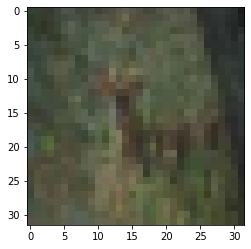

In [ ]:
print(type(x_trainval), x_trainval.shape)
print(type(x_trainval), x_trainval.shape)

plt.imshow(x_trainval[10])